# Homework 3

## Pair Programming Group Number: 31
## Members of Team: Jeremy Ulfohn, Anthony Roth-Giacinto

## Feature engineering and linear regression

For this week's homework we are going to load in a data set that isn't in the "cleanest", repair it, add a feature, do some analysis on the features, build a linear regression model, and use that model to estimate numeric values.  Is linear regression _really_ machine learning? Depends on whom you ask, but it is definitely an important tool for data analytics. 

In [1]:
# only use these libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load in the melb_data_sold_train.csv file here
SoldTrainURL = 'https://gist.githubusercontent.com/TieJean/797fc6b68b98dc93d9270c1d9b5759d5/raw/a2d467663d9320913ca4b3c52aa75bb20e42988e/melb_data_sold_train.csv/'
SoldTestURL = 'https://gist.githubusercontent.com/TieJean/e17178b1ffcb594dbf2232de90f8bb1f/raw/17c751b38a159b246321100188f35fa7cfb6c0b9/melb_data_sold_test.csv/'
df = pd.read_csv(SoldTrainURL) # subset to "train" a model
dfTest = pd.read_csv(SoldTestURL) # subset on which to test this trained model

## Q1 Fix the dataframe to remove any blanks
The linear regression needs all attribute and dependent values to be defined.  Use list-wise deletion to remove entries with missing values. Save the modified dataframe with the indices reset to be $0-(length-1)$ into the variable `df1` for use in a later problem. 

In [2]:
# df1 will be the dataframe on which 'List-wise Deletion' has been performed
# inplace = False so that original 'df' is unmodified
# then .reset_index() method. drop = True means to DISCARD the original index
df1 = df.dropna(inplace=False).reset_index(drop=True)
df1



,Suburb,Address,Rooms,Type,Price,Date,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname
0,Abbotsford,25 Bloomburg St,2,h,1035000.0,4/02/2016,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan
1,Abbotsford,124 Yarra St,3,h,1876000.0,7/05/2016,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.80240,144.99930,Northern Metropolitan
2,Abbotsford,98 Charles St,2,h,1636000.0,8/10/2016,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.80600,144.99540,Northern Metropolitan
3,Abbotsford,10 Valiant St,2,h,1097000.0,8/10/2016,3067.0,3.0,1.0,2.0,220.0,75.0,1900.0,Yarra,-37.80100,144.99890,Northern Metropolitan
4,Abbotsford,123/56 Nicholson St,2,u,750000.0,12/11/2016,3067.0,2.0,2.0,1.0,0.0,94.0,2009.0,Yarra,-37.80780,144.99650,Northern Metropolitan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,Glenroy,69 Melbourne Av,3,h,680000.0,29/07/2017,3046.0,3.0,1.0,1.0,422.0,104.0,1960.0,Moreland,-37.70425,144.93164,Northern Metropolitan
3906,Greensborough,12 Yangoora Pl,4,h,900000.0,29/07/2017,3088.0,4.0,3.0,1.0,807.0,190.0,1975.0,Banyule,-37.70077,145.12743,Northern Metropolitan
3907,Highett,1/12 Jillian Av,3,t,1200000.0,29/07/2017,3190.0,3.0,1.0,2.0,269.0,125.0,2000.0,Bayside,-37.94775,145.02379,Southern Metropolitan
3908,Highett,31 The Crescent,4,t,1200000.0,29/07/2017,3190.0,4.0,2.0,2.0,304.0,183.0,2007.0,Kingston,-37.94633,145.04947,Southern Metropolitan


## Q2 Add a new feature
Toorak is known as one of the priciest suburbs in Melbourne.  Create a new column in your dataframe that is the distance in kilometers from the center of Toorak to the latitude/longitude of that row.  Use the latitude / longitude of $(-37.841820, 145.015986)$ for the center of Toorak.  You may assume the Earth is spherical and has radius of $6371.0088$km (check your function ... the property located at $(-37.68178,144.73779)$ is approx 30.2 km away)

In [3]:
# Step 1 : Define the Haversine distance as a function
# assumes that pt1 and pt2 are 2x1 [lat,long] np arrays that contain locations of the 2 earth coordinates in deg
# using the Haversine formula found https://en.wikipedia.org/wiki/Haversine_formula

from math import * # import math library

def haversine_distance(pt1,pt2):
    # code here, make sure pt1 and pt2 are passed in as degrees (lat,long)
    # then convert to radians before calculation
    
    lat1 = pt1[0]
    lon1 = pt1[1]
    lat2 = pt2[0]
    lon2 = pt2[1]

    # convert decimal degrees to radians using Python's map()
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # apply the Haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers (final units too)
    return c * r





In [4]:
# A quick check to see if we are getting the expected value
toorak_pt = np.array([-37.841820, 145.015986])
haversine_distance(toorak_pt,[-37.68178,144.73779])
# PASSED TEST (== 30.2km)
df1

,Suburb,Address,Rooms,Type,Price,Date,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname
0,Abbotsford,25 Bloomburg St,2,h,1035000.0,4/02/2016,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan
1,Abbotsford,124 Yarra St,3,h,1876000.0,7/05/2016,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.80240,144.99930,Northern Metropolitan
2,Abbotsford,98 Charles St,2,h,1636000.0,8/10/2016,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.80600,144.99540,Northern Metropolitan
3,Abbotsford,10 Valiant St,2,h,1097000.0,8/10/2016,3067.0,3.0,1.0,2.0,220.0,75.0,1900.0,Yarra,-37.80100,144.99890,Northern Metropolitan
4,Abbotsford,123/56 Nicholson St,2,u,750000.0,12/11/2016,3067.0,2.0,2.0,1.0,0.0,94.0,2009.0,Yarra,-37.80780,144.99650,Northern Metropolitan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,Glenroy,69 Melbourne Av,3,h,680000.0,29/07/2017,3046.0,3.0,1.0,1.0,422.0,104.0,1960.0,Moreland,-37.70425,144.93164,Northern Metropolitan
3906,Greensborough,12 Yangoora Pl,4,h,900000.0,29/07/2017,3088.0,4.0,3.0,1.0,807.0,190.0,1975.0,Banyule,-37.70077,145.12743,Northern Metropolitan
3907,Highett,1/12 Jillian Av,3,t,1200000.0,29/07/2017,3190.0,3.0,1.0,2.0,269.0,125.0,2000.0,Bayside,-37.94775,145.02379,Southern Metropolitan
3908,Highett,31 The Crescent,4,t,1200000.0,29/07/2017,3190.0,4.0,2.0,2.0,304.0,183.0,2007.0,Kingston,-37.94633,145.04947,Southern Metropolitan


In [5]:
# Step 2 : Add a new column to `df1` called 'distance_to_toorak' that uses the haversine_distance function 
# to calculate the distance to Toorak for every row in our dataframe. Save the new dataframe as `df2`

# create df2 as described above, using columns 'Lattitude' and 'Longitude'
df2 = df1 # WARNING: note the misspellings in the column names!
# use lambda function to use multiple df columns at once as the function's argument
df2['distance_to_toorak'] = df.apply(lambda x: haversine_distance(np.array([x['Lattitude'], x['Longtitude']]), toorak_pt), axis=1)
df2


,Suburb,Address,Rooms,Type,Price,Date,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,distance_to_toorak
0,Abbotsford,25 Bloomburg St,2,h,1035000.0,4/02/2016,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4.942248
1,Abbotsford,124 Yarra St,3,h,1876000.0,7/05/2016,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.80240,144.99930,Northern Metropolitan,4.261606
2,Abbotsford,98 Charles St,2,h,1636000.0,8/10/2016,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.80600,144.99540,Northern Metropolitan,4.570904
3,Abbotsford,10 Valiant St,2,h,1097000.0,8/10/2016,3067.0,3.0,1.0,2.0,220.0,75.0,1900.0,Yarra,-37.80100,144.99890,Northern Metropolitan,4.621837
4,Abbotsford,123/56 Nicholson St,2,u,750000.0,12/11/2016,3067.0,2.0,2.0,1.0,0.0,94.0,2009.0,Yarra,-37.80780,144.99650,Northern Metropolitan,4.374200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,Glenroy,69 Melbourne Av,3,h,680000.0,29/07/2017,3046.0,3.0,1.0,1.0,422.0,104.0,1960.0,Moreland,-37.70425,144.93164,Northern Metropolitan,4.672022
3906,Greensborough,12 Yangoora Pl,4,h,900000.0,29/07/2017,3088.0,4.0,3.0,1.0,807.0,190.0,1975.0,Banyule,-37.70077,145.12743,Northern Metropolitan,2.938695
3907,Highett,1/12 Jillian Av,3,t,1200000.0,29/07/2017,3190.0,3.0,1.0,2.0,269.0,125.0,2000.0,Bayside,-37.94775,145.02379,Southern Metropolitan,14.302361
3908,Highett,31 The Crescent,4,t,1200000.0,29/07/2017,3190.0,4.0,2.0,2.0,304.0,183.0,2007.0,Kingston,-37.94633,145.04947,Southern Metropolitan,16.511213


## Q3 Create a one hot encoding for the categorical column 'Type'
Modify the data frame `df2` such that it removes the column for `Type` and replaces it with the appropriate number of columns for a one-hot encoding of the column `Type` and save that dataframe as `df3` for use in a later problem. The pandas method [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) will be very useful here. 

In [6]:
# ['Type'] = br, h, u, t, dev site, o res
# .get_dummies() accomplishes this all in one fell sweep, with automatic replacement
df3 = pd.get_dummies(data=df2, columns=['Type'])
df3


,Suburb,Address,Rooms,Price,Date,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,distance_to_toorak,Type_h,Type_t,Type_u
0,Abbotsford,25 Bloomburg St,2,1035000.0,4/02/2016,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4.942248,1,0,0
1,Abbotsford,124 Yarra St,3,1876000.0,7/05/2016,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.80240,144.99930,Northern Metropolitan,4.261606,1,0,0
2,Abbotsford,98 Charles St,2,1636000.0,8/10/2016,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.80600,144.99540,Northern Metropolitan,4.570904,1,0,0
3,Abbotsford,10 Valiant St,2,1097000.0,8/10/2016,3067.0,3.0,1.0,2.0,220.0,75.0,1900.0,Yarra,-37.80100,144.99890,Northern Metropolitan,4.621837,1,0,0
4,Abbotsford,123/56 Nicholson St,2,750000.0,12/11/2016,3067.0,2.0,2.0,1.0,0.0,94.0,2009.0,Yarra,-37.80780,144.99650,Northern Metropolitan,4.374200,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,Glenroy,69 Melbourne Av,3,680000.0,29/07/2017,3046.0,3.0,1.0,1.0,422.0,104.0,1960.0,Moreland,-37.70425,144.93164,Northern Metropolitan,4.672022,1,0,0
3906,Greensborough,12 Yangoora Pl,4,900000.0,29/07/2017,3088.0,4.0,3.0,1.0,807.0,190.0,1975.0,Banyule,-37.70077,145.12743,Northern Metropolitan,2.938695,1,0,0
3907,Highett,1/12 Jillian Av,3,1200000.0,29/07/2017,3190.0,3.0,1.0,2.0,269.0,125.0,2000.0,Bayside,-37.94775,145.02379,Southern Metropolitan,14.302361,0,1,0
3908,Highett,31 The Crescent,4,1200000.0,29/07/2017,3190.0,4.0,2.0,2.0,304.0,183.0,2007.0,Kingston,-37.94633,145.04947,Southern Metropolitan,16.511213,0,1,0


## Q4 Calculate the pairwise correlations between all of your numeric attributes
Use the Pearson correlation as discussed in the lectures to calculate the pairwise correlations between the attributes in the dataframe `df3`. Read the documentation for [corr](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html). 

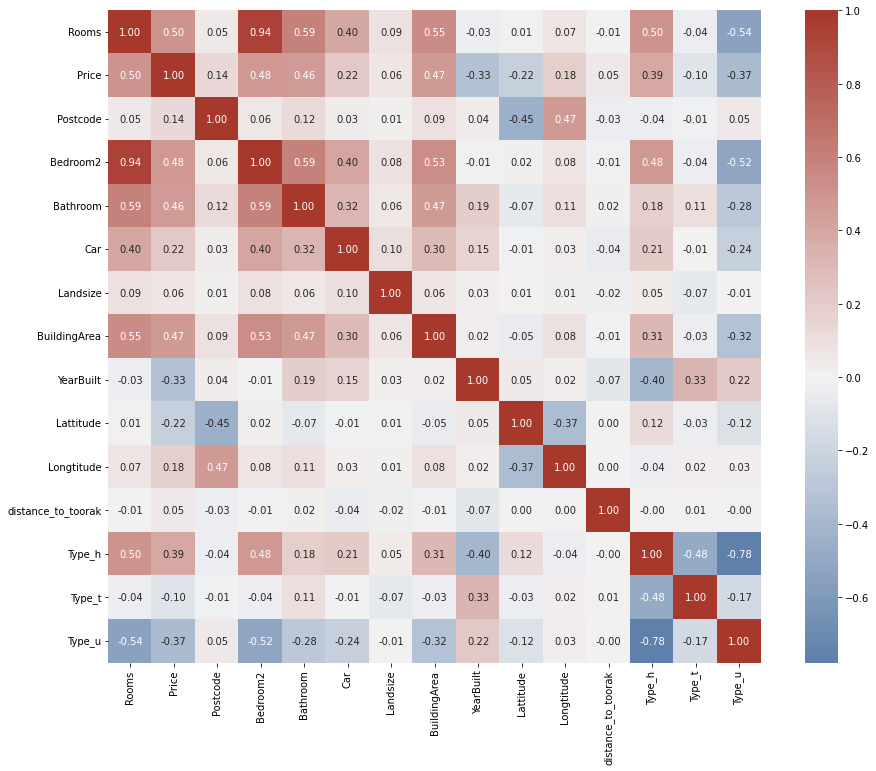

In [7]:
import seaborn as sns
matrix = df3.corr() # Pearson is the default parameter for .corr()
plt.figure(figsize=(16,12))

# create a diverging grid with correlation floats using Seaborn library
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                n=9, center="light", as_cmap=True)

_ = sns.heatmap(matrix, center=0, annot=True, 
                fmt='.2f', square=True, cmap=cmap) # cmap == colormap..?

## Q5 Create a linear regression model to predict home values
Using the math in ESLII, section 3.2 equation (3.6) calculate $\hat{\beta}$

We are going to create a linear regression model using our numeric attribute columns in `df3`, and specifying the home values (`Price` column) as the value we are trying to predict.  You may use numpy to do matrix calculations, but you may not use a built in regression library (for example, you may not use scikt-learn). 

The features you use to build the matrix $X$ should all be numeric and include the distance to Toorak and the one hot encodings. 

In [16]:
# Step one, build the matrix X
df3_numeric = df3.select_dtypes(np.number)
df4 = df3_numeric.iloc[:, 11:15]
df4.insert(0, 'y_int', 1)
X = df4.to_numpy() # .to_numpy() converts df to a NumPy Array object
X


array([[ 1.        ,  4.94224815,  1.        ,  0.        ,  0.        ],
       [ 1.        ,  4.2616062 ,  1.        ,  0.        ,  0.        ],
       [ 1.        ,  4.57090423,  1.        ,  0.        ,  0.        ],
       ...,
       [ 1.        , 14.3023614 ,  0.        ,  1.        ,  0.        ],
       [ 1.        , 16.51121254,  0.        ,  1.        ,  0.        ],
       [ 1.        , 16.66695035,  1.        ,  0.        ,  0.        ]])

In [17]:
# Step two, build the column vector y
df3_prices = df3_numeric.iloc[:, 1]
y = df3_prices.to_numpy()
y.reshape(3910, 1)

array([[1035000.],
       [1876000.],
       [1636000.],
       ...,
       [1200000.],
       [1200000.],
       [ 618350.]])

In [20]:
# Step three, find beta hat per the formula (3.6) (you should use the library we used in class)
[beta_hat, residuals, rank, s] = np.linalg.lstsq(X, y, rcond=-1) # rcond=None is the newest format
beta_hat

array([645958.00431959,   7519.20755094, 548396.58499736, 184793.95519689,
       -87232.53587466])

In [23]:
# Test the model to see if we get something "reasonable" - i picked 23 at random 
X = pd.DataFrame(X, columns = ['Y_int', 'distance_to_toorak', 'Type_h', 'Type_t', 'Type_u'])
np.matmul(X.iloc[23],beta_hat) 

1227440.0157920588

In [22]:
# This is the actual price at this point
y[23]

805000.0

## Q6 Apply the linear regression model to the test data and visualize the error
We will cover other methods of evaluating any sort of prediction later, but for this week's exercise I have partitioned the data into two files.  Load the melb_data_sold_test.csv data set and use the $\hat{\beta}$ you calculated in the last step to predict the housing prices for data in melb_data_sold_test.  Create a visualization that shows the absolute error in your predictions. Remember to do all your data pre-processing on the data loaded from the melb_data_sold_test file before you apply beta_hat.  For the visualization, a histogram of the absolute error vs the total housing prices is sufficient.  Use [hist](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.hist.html) for reference. 

While doing imputation, there are some helpful parameters in [fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html). 

In [12]:
# Step zero, load the melb_data_sold_test.csv data for testing.  Use Imputation to fill in any missing numeric values
# We use imputation here instead of deletion since we want a prediction for _every_ row in the test file.
# Imputation method: .fillna() with mode
test_df = dfTest.fillna(dfTest.mode().iloc[0])
test_df


,Suburb,Address,Rooms,Type,Price,Date,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname
0,Jacana,29 Fox Ct,3,h,620500.0,29/07/2017,3047.0,3.0,1.0,4.0,764.0,150.0,1970.0,Hume,-37.68907,144.91459,Northern Metropolitan
1,Keilor Park,45 Collinson St,3,h,750000.0,29/07/2017,3042.0,3.0,2.0,2.0,761.0,222.0,1980.0,Brimbank,-37.72224,144.85739,Western Metropolitan
2,Kensington,42 Gower St,3,h,1060000.0,29/07/2017,3031.0,3.0,1.0,0.0,190.0,150.0,1970.0,Melbourne,-37.79560,144.92779,Northern Metropolitan
3,Kew,6/385 Barkers Rd,3,t,1405000.0,29/07/2017,3101.0,3.0,2.0,2.0,325.0,129.0,1980.0,Boroondara,-37.81614,145.05056,Southern Metropolitan
4,Kew,11 Raheen Dr,4,h,3015000.0,29/07/2017,3101.0,4.0,2.0,2.0,813.0,276.0,1970.0,Boroondara,-37.80437,145.01725,Southern Metropolitan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,Wantirna South,15 Mara Cl,4,h,1330000.0,26/08/2017,3152.0,4.0,2.0,2.0,717.0,191.0,1980.0,Whittlesea,-37.86887,145.22116,Eastern Metropolitan
1017,Werribee,5 Nuragi Ct,4,h,635000.0,26/08/2017,3030.0,4.0,2.0,1.0,662.0,172.0,1980.0,Whittlesea,-37.89327,144.64789,Western Metropolitan
1018,Westmeadows,9 Black St,3,h,582000.0,26/08/2017,3049.0,3.0,2.0,2.0,256.0,150.0,1970.0,Whittlesea,-37.67917,144.89390,Northern Metropolitan
1019,Wheelers Hill,12 Strada Cr,4,h,1245000.0,26/08/2017,3150.0,4.0,2.0,2.0,652.0,150.0,1981.0,Whittlesea,-37.90562,145.16761,South-Eastern Metropolitan


In [13]:
# Step one, add the new attribute for the 'distance_to_toorak' and the one hot encoding to the new data frame
test_df['distance_to_toorak'] = test_df.apply(lambda x: haversine_distance(np.array([x['Lattitude'], x['Longtitude']]), toorak_pt), axis=1)
test_df = pd.get_dummies(data=test_df, columns=['Type'])
test_df

,Suburb,Address,Rooms,Price,Date,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,distance_to_toorak,Type_h,Type_t,Type_u
0,Jacana,29 Fox Ct,3,620500.0,29/07/2017,3047.0,3.0,1.0,4.0,764.0,150.0,1970.0,Hume,-37.68907,144.91459,Northern Metropolitan,19.181540,1,0,0
1,Keilor Park,45 Collinson St,3,750000.0,29/07/2017,3042.0,3.0,2.0,2.0,761.0,222.0,1980.0,Brimbank,-37.72224,144.85739,Western Metropolitan,19.263042,1,0,0
2,Kensington,42 Gower St,3,1060000.0,29/07/2017,3031.0,3.0,1.0,0.0,190.0,150.0,1970.0,Melbourne,-37.79560,144.92779,Northern Metropolitan,9.296797,1,0,0
3,Kew,6/385 Barkers Rd,3,1405000.0,29/07/2017,3101.0,3.0,2.0,2.0,325.0,129.0,1980.0,Boroondara,-37.81614,145.05056,Southern Metropolitan,4.168245,0,1,0
4,Kew,11 Raheen Dr,4,3015000.0,29/07/2017,3101.0,4.0,2.0,2.0,813.0,276.0,1970.0,Boroondara,-37.80437,145.01725,Southern Metropolitan,4.165730,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,Wantirna South,15 Mara Cl,4,1330000.0,26/08/2017,3152.0,4.0,2.0,2.0,717.0,191.0,1980.0,Whittlesea,-37.86887,145.22116,Eastern Metropolitan,18.262714,1,0,0
1017,Werribee,5 Nuragi Ct,4,635000.0,26/08/2017,3030.0,4.0,2.0,1.0,662.0,172.0,1980.0,Whittlesea,-37.89327,144.64789,Western Metropolitan,32.814304,1,0,0
1018,Westmeadows,9 Black St,3,582000.0,26/08/2017,3049.0,3.0,2.0,2.0,256.0,150.0,1970.0,Whittlesea,-37.67917,144.89390,Northern Metropolitan,21.030489,1,0,0
1019,Wheelers Hill,12 Strada Cr,4,1245000.0,26/08/2017,3150.0,4.0,2.0,2.0,652.0,150.0,1981.0,Whittlesea,-37.90562,145.16761,South-Eastern Metropolitan,15.081312,1,0,0


In [ ]:
# Step two, build the attribute matrix Xdot
test_df_numeric = test_df.select_dtypes(np.number)
test_df_numeric = test_df_numeric.iloc[:, 11:15]
test_df_numeric.insert(0, 'y_int', 1)
Xdot = test_df_numeric.to_numpy()
Xdot

array([[ 1.        , 19.18154039,  1.        ,  0.        ,  0.        ],
       [ 1.        , 19.26304161,  1.        ,  0.        ,  0.        ],
       [ 1.        ,  9.29679725,  1.        ,  0.        ,  0.        ],
       ...,
       [ 1.        , 21.03048903,  1.        ,  0.        ,  0.        ],
       [ 1.        , 15.0813123 ,  1.        ,  0.        ,  0.        ],
       [ 1.        , 11.35733987,  1.        ,  0.        ,  0.        ]])

In [ ]:
# Step three, multiply Xdot by Beta hat. DO NOT USE A LOOP.  This is a vector of predicted prices
# called y_hat in the notes
test_prices = np.matmul(Xdot, beta_hat)
test_prices.reshape(1021, 1)

array([[1338584.57265352],
       [1339197.39725676],
       [1264259.1373713 ],
       ...,
       [1352487.20121297],
       [1307754.10660794],
       [1279752.78500936]])

In [ ]:
# Step four, calculate the error vector, |actual price - predicted price|. We call this our "absolute error"
error_vector = test_prices.copy()
for idx, val in enumerate(error_vector):
  price_diff = abs((test_df['Price'][idx]) - val)
  error_vector[idx] = price_diff
error_vector.reshape(1021, 1)

array([[718084.57265352],
       [589197.39725676],
       [204259.1373713 ],
       ...,
       [770487.20121297],
       [ 62754.10660794],
       [109752.78500936]])

In [ ]:
# Step five, create a histogram of the absolute error, and on the same plot create a histogram of the actual price.  
# You should use the "alpha" parameter to make the graph on top slightly translucent 